# Basic Example

This short notebook shows how to get started with HiggsDNA and [Coffea](https://github.com/CoffeaTeam/coffea).

In [1]:
from higgs_dna.utils.logger_utils import setup_logger
from higgs_dna.workflows import DYStudiesProcessor
import awkward as ak
import uproot
from coffea import processor
import json
from importlib import resources
import hist
import matplotlib.pyplot as plt
import numpy as np
import os
import xgboost
import coffea.util as util

In [2]:
xgboost.__version__


'1.5.1'

In [117]:
fileset = {
    "2017": "/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev-master/higgs-dna-tiziano-bevilacqua/scripts/FS_PS_Gen_2017_GenJets_eta6_pt0/merged/cH_4FS_FXFX_M125_2017/nominal/UNTAGGED_merged.parquet",
    "2018": "/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev-master/higgs-dna-tiziano-bevilacqua/scripts/FS_PS_Gen_2018_GenJets/merged/cH_4FS_FXFX_M125_2018/nominal/UNTAGGED_merged.parquet",
    "2022": "/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev-master/higgs-dna-tiziano-bevilacqua/scripts/FS_PS_Gen_2022_GenJets_eta6_pt0/merged/cH_4FS_FXFX_M125_2022/nominal/UNTAGGED_merged.parquet"
}

In [118]:
with resources.open_text("higgs_dna.metaconditions", "cross_sections.json") as f:
    metaconditions = json.load(f)

In [119]:
ch_events = {}
years = ["2022", "2018", "2017"]
for y in years:
    ch_events[y] = ak.from_parquet(fileset[y])


In [6]:
year = "2017"
flavour = "Charm"

In [7]:
bounds = {"2018": {}, "2017": {}, "2016": {}, "2016/2016PostVFP": {}, "2016/2016PreVFP": {}, "2018_old": {}, "2017_old": {}, "2016_old": {}}
bounds["2018_old"]["MVAcHvsggH"] = [0, 0.18, 0.51, 1.]
bounds["2018_old"]["MVAcHvsCB"] = [0, 0.48, 0.74, 0.84, 1.]
bounds["2018_old"]["leadingJet_DeepFlavour_CvsL"] = [-1, 0.05, 0.1, 0.25, 1.]
bounds["2018_old"]["first_jet_DeepFlavour_CvsL"] = [-1, 0.05, 0.1, 0.25, 1.]
bounds["2017_old"]["MVAcHvsggH"] = [0, 0.35, 0.63, 1.]
bounds["2017_old"]["MVAcHvsCB"] = [0, 0.55, 0.73, 0.82, 1.]
bounds["2017_old"]["leadingJet_DeepFlavour_CvsL"] = [-1, 0.05, 0.1, 0.25, 1.]
bounds["2017_old"]["first_jet_DeepFlavour_CvsL"] = [-1, 0.05, 0.1, 0.25, 1.]
bounds["2016_old"]["MVAcHvsggH"] = [0, 0.30, 0.58, 1.]
bounds["2016_old"]["MVAcHvsCB"] = [0, 0.59, 0.78, 0.85, 1.]
bounds["2016_old"]["leadingJet_DeepFlavour_CvsL"] = [-1, 0.05, 0.1, 0.25, 1.]
bounds["2016_old"]["first_jet_DeepFlavour_CvsL"] = [-1, 0.05, 0.1, 0.25, 1.]
bounds["2018"]["MVAcHvsggH"] = [0, 0.2, 0.5, 1.]
bounds["2018"]["MVAcHvsCB"] = [0, 0.64, 0.81, 1.]
bounds["2018"]["leadingJet_DeepFlavour_CvsL"] = [-1, 0.1, 0.25, 1.]
bounds["2018"]["first_jet_DeepFlavour_CvsL"] = [-1, 0.1, 0.25, 1.]
bounds["2017"]["MVAcHvsggH"] = [0, 0.4, 0.65, 1.]
bounds["2017"]["MVAcHvsCB"] = [0, 0.61, 0.8, 1.]
bounds["2017"]["leadingJet_DeepFlavour_CvsL"] = [-1, 0.1, 0.25, 1.]
bounds["2017"]["first_jet_DeepFlavour_CvsL"] = [-1, 0.1, 0.25, 1.]
bounds["2016"]["MVAcHvsggH"] = [0, 0.35, 0.65, 1.]
bounds["2016"]["MVAcHvsCB"] = [0, 0.63, 0.82, 1.]
bounds["2016"]["leadingJet_DeepFlavour_CvsL"] = [-1, 0.1, 0.25, 1.]
bounds["2016"]["first_jet_DeepFlavour_CvsL"] = [-1, 0.1, 0.25, 1.]
bounds["2016/2016PostVFP"]["MVAcHvsggH"] = [0, 0.35, 0.65, 1.]
bounds["2016/2016PostVFP"]["MVAcHvsCB"] = [0, 0.63, 0.82, 1.]
bounds["2016/2016PostVFP"]["leadingJet_DeepFlavour_CvsL"] = [-1, 0.1, 0.25, 1.]
bounds["2016/2016PostVFP"]["first_jet_DeepFlavour_CvsL"] = [-1, 0.1, 0.25, 1.]
bounds["2016/2016PreVFP"]["MVAcHvsggH"] = [0, 0.35, 0.65, 1.]
bounds["2016/2016PreVFP"]["MVAcHvsCB"] = [0, 0.63, 0.82, 1.]
bounds["2016/2016PreVFP"]["leadingJet_DeepFlavour_CvsL"] = [-1, 0.1, 0.25, 1.]
bounds["2016/2016PreVFP"]["first_jet_DeepFlavour_CvsL"] = [-1, 0.1, 0.25, 1.]

#coffee = util.load(f"/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev-master/higgs-dna-tiziano-bevilacqua/scripts/out_dir_FS_cH_{year}/ch_signal.coffea")
if "2016" not in year:
    coffee = util.load(f"/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev-master/higgs-dna-tiziano-bevilacqua/scripts/GenPlusFSPlusQCD_Allunc_{year}/ch_signal.coffea")
else:
    if "Pre" in year:
        coffee = util.load(f"/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev-master/higgs-dna-tiziano-bevilacqua/scripts/FS_PS_Gen_2016_pre/ch_signal.coffea")
    elif "Post" in year:
        coffee = util.load(f"/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev-master/higgs-dna-tiziano-bevilacqua/scripts/FS_PS_Gen_2016_post/ch_signal.coffea")
    else:
        coffee = util.load(f"/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev-master/higgs-dna-tiziano-bevilacqua/scripts/FS_PS_Gen_2016_tot/ch_signal.coffea")

In [8]:
ncats = 27
trees = {"3FS": {}, "4FS": {}, "4FS_FXFX": {}}

for sample in trees:
    for cat in range(ncats):
        if "2016" not in year:
            #trees[sample][f"cHTag_{cat}"] = uproot.open(f"{year}/HPlus{flavour}_{sample}_13TeV_125_tree.root:tagsDumper/trees/HPlus{flavour}_{sample}_13TeV_125_13TeV_cHTag_{cat}")
            #trees[sample][f"cHTag_{cat}"] = ak.from_parquet(f"/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev-master/higgs-dna-tiziano-bevilacqua/scripts/FSunc_gen_cH_{year}/merged/cH_{sample}_M125_{year}/cHTag_{cat}_merged.parquet")
            trees[sample][f"cHTag_{cat}"] = ak.from_parquet(f"/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev-master/higgs-dna-tiziano-bevilacqua/scripts/GenPlusFSPlusQCD_Allunc_{year}/merged/cH_{sample}_M125_{year}/nominal/cHTag_{cat}_merged.parquet")
        else:
            if "Pre" in year:
                trees[sample][f"cHTag_{cat}"] = ak.from_parquet(f"/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev-master/higgs-dna-tiziano-bevilacqua/scripts/FS_PS_Gen_2016_pre/merged/cH_{sample}_M125_2016/nominal/cHTag_{cat}_merged.parquet")
            elif "Post" in year:
                trees[sample][f"cHTag_{cat}"] = ak.from_parquet(f"/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev-master/higgs-dna-tiziano-bevilacqua/scripts/FS_PS_Gen_2016_post/merged/cH_{sample}_M125_2016/nominal/cHTag_{cat}_merged.parquet")
            else:
                trees[sample][f"cHTag_{cat}"] = ak.from_parquet(f"/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev-master/higgs-dna-tiziano-bevilacqua/scripts/FS_PS_Gen_2016_tot/merged/cH_{sample}_M125_2016/nominal/cHTag_{cat}_merged.parquet")

In [9]:
norm_1fb = {
    "Charm": {
        "3FS": 0.04987 * 0.00227 * 1000 / coffee["weight_sum_gen"]["ch_3FS"],
        "4FS": 0.08065 * 0.00227 * 1000 / coffee["weight_sum_gen"]["ch_4FS"],
        "4FS_FXFX": 0.09013 * 0.00227 * 1000 / coffee["weight_sum_gen"]["ch"]
    },
    "Bottom": {
        "4FS": 0.3650 * 0.00227 * 1000 / coffee["weight_sum_gen"]["ch_3FS"],
        "5FS": 0.5673 * 0.00227 * 1000 / coffee["weight_sum_gen"]["ch_4FS"],
        "5FS_FXFX": 0.6654 * 0.00227 * 1000 / coffee["weight_sum_gen"]["ch"]
    }
}

In [10]:
# this cell is for new HDNA samples integrated with bdts
d = {}

keys = ["CMS_hgg_mass", "dZ", "ch_vs_ggh_bdt_score", "ch_vs_cb_bdt_score", "first_jet_DeepFlavour_CvsL", "first_jet_DeepFlavour_CvsB", "second_jet_DeepFlavour_CvsL", "second_jet_DeepFlavour_CvsB", "first_jet_pt", "first_jet_eta", "first_jet_phi", "first_jet_mass", "n_jets"]
weight_sums = {[*trees][0]: 0., [*trees][1]: 0., [*trees][2]: 0.}

for field in trees[sample][f"cHTag_0"].fields:
    if "weight" in field and "AlphaS" not in field:
        keys = keys + [field] 
for tree in trees:
    d[tree] = {}
    for cat in trees[tree].keys():
        d[tree][cat] = {}
        for key in keys:
            if key != "weight" and "score" not in key:
                d[tree][cat][key] = trees[tree][cat][key]
            elif key != "weight":
                if "ggh" in key:
                    d[tree][cat]["MVAcHvsggH"] = trees[tree][cat][key]
                else:
                    d[tree][cat]["MVAcHvsCB"] = trees[tree][cat][key]
            else:
                d[tree][cat][key] = trees[tree][cat][key] * norm_1fb[flavour][tree]
                d[tree][cat]["sq_weight"] = np.square(d[tree][cat][key])
                d[tree][cat]["sq_weight_err"] = np.sqrt(ak.sum(d[tree][cat]["sq_weight"]))
                weight_sums[tree] += ak.sum(trees[tree][cat][key] * norm_1fb[flavour][tree])

for tree in trees:
    print(f"{tree}: {weight_sums[tree]}")

print(len(d["4FS"][cat]["weight"]))
print(d["4FS"][cat]["sq_weight_err"])

3FS: 0.0276829828181594
4FS: 0.04164669727108256
4FS_FXFX: 0.0475261658329483
1410
4.617007340194049e-06


In [11]:
ch_events["2022"].fields

['weight',
 'weight_central',
 'centralObjectWeight',
 'bdt_score',
 'dZ',
 'CMS_hgg_mass',
 'event',
 'pt',
 'eta',
 'phi',
 'LeadPhoton_pt_mgg',
 'LeadPhoton_eta',
 'LeadPhoton_phi',
 'LeadPhoton_mvaID',
 'SubleadPhoton_pt_mgg',
 'SubleadPhoton_eta',
 'SubleadPhoton_phi',
 'SubleadPhoton_mvaID',
 'LeadPhoton_pt',
 'SubleadPhoton_pt',
 'LeadPhoton_energy',
 'LeadPhoton_energyErr',
 'LeadPhoton_energyRaw',
 'SubleadPhoton_energy',
 'SubleadPhoton_energyErr',
 'SubleadPhoton_energyRaw',
 'n_jets',
 'first_jet_pt',
 'first_jet_eta',
 'first_jet_phi',
 'first_jet_mass',
 'first_jet_hFlav',
 'first_jet_DeepFlavour_CvsL',
 'first_jet_DeepFlavour_CvsB',
 'second_jet_pt',
 'second_jet_eta',
 'second_jet_phi',
 'second_jet_mass',
 'second_jet_hFlav',
 'second_jet_DeepFlavour_CvsL',
 'second_jet_DeepFlavour_CvsB',
 'n_GenJets',
 'first_GenJet_pt',
 'first_GenJet_eta',
 'first_GenJet_phi',
 'first_GenJet_mass',
 'first_GenJet_hFlav',
 'first_GenJet_pFlav',
 'second_GenJet_pt',
 'second_GenJet_et

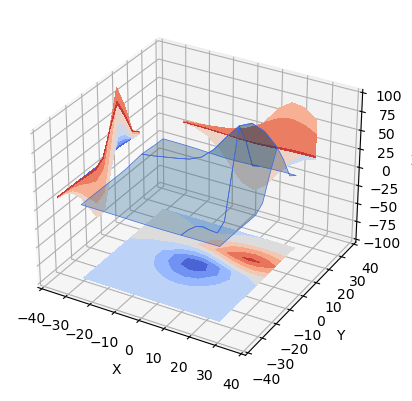

In [12]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.5)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')
ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap='coolwarm')
ax.contourf(X, Y, Z, zdir='y', offset=40, cmap='coolwarm')

ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()

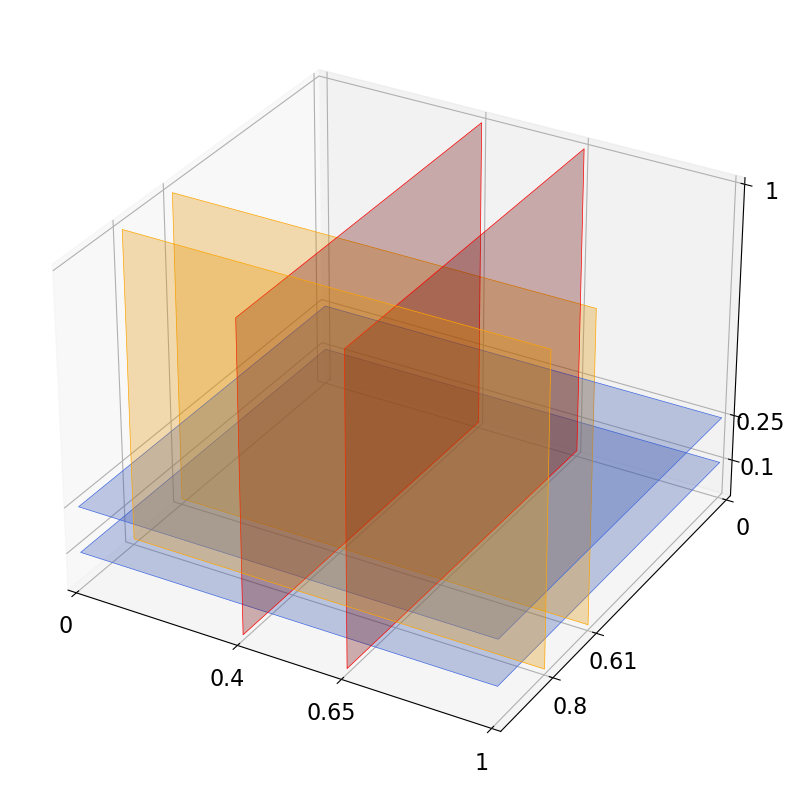

In [13]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
X = np.array([[0., 0.4, 0.65, 1.],
              [0., 0.4, 0.65, 1.],
              [0., 0.4, 0.65, 1.],
              [0., 0.4, 0.65, 1.]])
Y = np.array([[0, 0, 0, 0],
              [0.61, 0.61, 0.61, 0.61],
              [0.8, 0.8, 0.8, 0.8],
              [1, 1, 1, 1.]])
Y4 = np.array([[0, 0.61, 0.8, 1],
              [0, 0.61, 0.8, 1],
              [0, 0.61, 0.8, 1],
              [0, 0.61, 0.8, 1]])
Z = np.array([[0, 0, 0, 0],
              [0.1, 0.1, 0.1, 0.1],
              [0.25, 0.25, 0.25, 0.25],
              [1, 1, 1, 1.]])

Z3 = np.array([[1, 1, 1, 1.],
              [1,1,1,1],
              [1,1,1,1],
              [1, 1, 1, 1.]])
Z1 = np.array([[0.1,0.1,0.1,0.1],
              [0.1,0.1,0.1,0.1],
              [0.1,0.1,0.1,0.1],
              [0.1,0.1,0.1,0.1]])
Z2 = np.array([[0.25,0.25,0.25,0.25],
              [0.25,0.25,0.25,0.25],
              [0.25,0.25,0.25,0.25],
              [0.25,0.25,0.25,0.25]])

Y1 = np.array([[0.61,0.61,0.61,0.61],
               [0.61,0.61,0.61,0.61],
               [0.61,0.61,0.61,0.61],
               [0.61,0.61,0.61,0.61]])
Y2 = np.array([[0.8,0.8,0.8,0.8],
               [0.8,0.8,0.8,0.8],
               [0.8,0.8,0.8,0.8],
               [0.8,0.8,0.8,0.8]])
Y3 = np.array([[1, 1, 1, 1.],
              [1,1,1,1],
              [1,1,1,1],
              [1, 1, 1, 1.]])

X1 = np.array([[0.4,0.4,0.4,0.4],
               [0.4,0.4,0.4,0.4],
               [0.4,0.4,0.4,0.4],
               [0.4,0.4,0.4,0.4]])
X2 = np.array([[0.65,0.65,0.65,0.65],
               [0.65,0.65,0.65,0.65],
               [0.65,0.65,0.65,0.65],
               [0.65,0.65,0.65,0.65]])
X3 = np.array([[1, 1, 1, 1.],
              [1,1,1,1],
              [1,1,1,1],
              [1, 1, 1, 1.]])

# Plot the 3D surface
ax.plot_surface(X, Y, Z1, edgecolor='royalblue', color='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)
ax.plot_surface(X, Y, Z2,  edgecolor='royalblue', color='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)
#ax.plot_surface(X, Y, Z3,  edgecolor='royalblue', color='royalblue', lw=0.5, rstride=8, cstride=8,
#                alpha=0.3)

ax.plot_surface(X, Y1, Z,  edgecolor='orange', color='orange', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)
ax.plot_surface(X, Y2, Z,  edgecolor='orange', color='orange', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)
#ax.plot_surface(X, Y3, Z,  edgecolor='orange', color='orange', lw=0.5, rstride=8, cstride=8,
 #               alpha=0.3)

ax.plot_surface(X1, Y4, Z,  edgecolor='red', color='red', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)
ax.plot_surface(X2, Y4, Z,  edgecolor='red', color='red', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)
#ax.plot_surface(X3, Y4, Z,  edgecolor='red', color='red', lw=0.5, rstride=8, cstride=8,
#                alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
#ax.contourf(X, Y, Z, zdir='z', offset=0, cmap='coolwarm')
#ax.contourf(X, Y, Z, zdir='x', offset=0, cmap='coolwarm')
#ax.contourf(X, Y, Z, zdir='y', offset=0, cmap='coolwarm')

ax.set(xlim=(0., 1), ylim=(1, 0), zlim=(0, 1))
xtics = [0, 0.4, 0.65, 1]
ytics = [0, 0.61, 0.8]
ztics = [ 0.1, 0.25, 1]

#ax.set_xlabel("BDT cH vs ggH", fontsize= 14 )
ax.xaxis.set_label_coords(0.5, 1.3, -0.9)
ax.yaxis.set_label_coords(1.2, 0.5, -0.9)
#ax.set_ylabel("BDT cH vs CB", fontsize= 14)
#ax.set_zlabel("CvsL", fontsize= 14, rotation=-90)

ax.set_xticks(xtics, xtics, fontsize=16)
ax.set_yticks(ytics, ytics, fontsize=16)
ax.set_zticks(ztics, ztics, fontsize=16)
plt.show()

In [14]:
print(X, len (X), len(X[0]))
print(Y, len (Y))
print(Z, len (Z))

[[0.   0.4  0.65 1.  ]
 [0.   0.4  0.65 1.  ]
 [0.   0.4  0.65 1.  ]
 [0.   0.4  0.65 1.  ]] 4 4
[[0.   0.   0.   0.  ]
 [0.61 0.61 0.61 0.61]
 [0.8  0.8  0.8  0.8 ]
 [1.   1.   1.   1.  ]] 4
[[0.   0.   0.   0.  ]
 [0.1  0.1  0.1  0.1 ]
 [0.25 0.25 0.25 0.25]
 [1.   1.   1.   1.  ]] 4


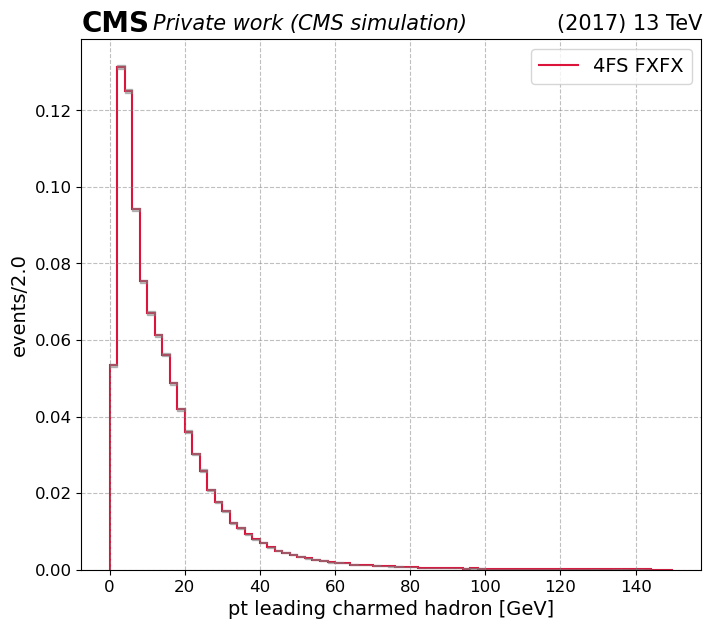

In [128]:
# vtx prob
fig = plt.figure(figsize=(8, 8))
#fig.subplots_adjust(top=0.8)
ax0 = plt.subplot2grid((6, 5), (1, 0), rowspan=5, colspan=5)
#ax1 = plt.subplot2grid((6, 5), (0, 0), rowspan=1, colspan=5)
#ax1.plot()
var = "first_GenPart_pt"
ax_name = "pt"
min_ = 0.
max_ = 150.
nbins = 75

NORM = True

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name = ax_name)
LeadPhoton_et_cax = hist.axis.StrCategory(["4FS FXFX"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)

for y in ["4FS FXFX"]:
    if NORM:
        weight = ch_events["2017"].weight / ak.sum(ch_events["2017"].weight)
    else:
        weight = ch_events["2017"].weight
    full_hist.fill(pt = ch_events["2017"][var], weight=weight, c=y)
    full_hist_err.fill(pt = ch_events["2017"][var], weight=weight**2, c=y)


h_stack = full_hist.stack("c")

h_stack[::-1].plot(ax=ax0, stack=False, histtype="step", color="crimson")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

for j, y in enumerate(["4FS FXFX"]):
# this is useful to manipulate bin content better when doing ratios and error plotting
    mc["bins"][y] = h_stack[j].to_numpy()[0]
    mc["edges"][y] = h_stack[j].to_numpy()[1]
    half_bin = np.abs((mc["edges"][y][1] - mc["edges"][y][0])) / 2
    mc["edges"][y] = mc["edges"][y] + half_bin
    mc["errs"][y] = np.sqrt(full_hist_err[:,y].to_numpy()[0])

    #create up and down edges to plot shaded area for each bin
    ydn = [mc["bins"][y][i] - x for i, x in enumerate(mc["errs"][y])]
    yup = [mc["bins"][y][i] + x for i, x in enumerate(mc["errs"][y])]
    
    # plot shaded area for MC errors
    for i, x in enumerate(mc["edges"][y][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="MC stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[i], ydn[i]], [yup[i], yup[i]], facecolor='grey', alpha=0.5, edgecolor='grey', label="")

# cosmetics
ax0.set_ylabel(f'events/{str(2 * half_bin)[:4]}', fontsize=14)
ax0.set_xlabel('pt leading charmed hadron [GeV]', fontsize=14)
ax0.set_title('', fontsize=20)
ax0.tick_params(axis='x', labelsize=12)
ax0.tick_params(axis='y', labelsize=12)
fig.subplots_adjust(top=0.9, bottom=0.1)
fig.text(0.125, 0.8, "CMS",  fontsize=20, verticalalignment='top', weight="bold")
fig.text(0.215, 0.795, "Private work (CMS simulation)",  fontsize=15, verticalalignment='top', style="italic")
fig.text(0.72, 0.795, "(2017) 13 TeV",  fontsize=15, verticalalignment='top')


# plot error bars
#ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")

plt.plot()
plt.show()
